In [78]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np
from pprint import pprint

In [79]:
SFB_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB_data = pd.read_csv(SFB_csv)
print(SFB_data.columns)
print("------------------------------")
print(SFB_data.shape)
print("------------------------------")
print(SFB_data.dtypes)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
------------------------------
(2217, 10)
------------------------------
State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6


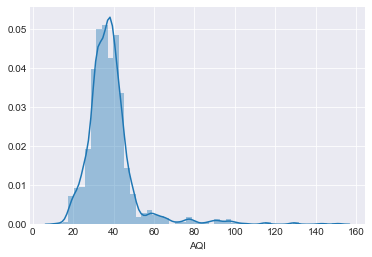

In [80]:
time_series_17 = SFB_data.Date
AQI = SFB_data.AQI
Category = SFB_data.Category
Ozone_param = SFB_data[SFB_data["Defining Parameter"] == 'Ozone']
Ozone_param_y = Ozone_param.AQI
Ozone_param_x = Ozone_param.Date
print(sns.distplot(Ozone_param_y))
# plt.bar(Ozone_param_x, Ozone_param_y) #AQI for Ozone measurement over 2017; need to bin dates into months
                        #and average values where the date is the same for a county's measurement.
SFB_data.head()

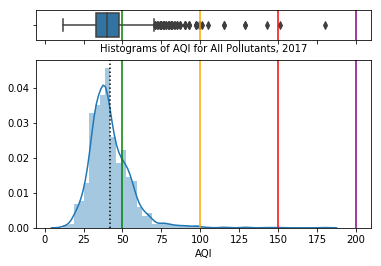

In [5]:
#Hist for all AQIs

Avg_AQI = SFB_data.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(SFB_data.AQI, ax=ax_box)
sns.distplot(SFB_data.AQI, ax=ax_hist)
plt.axvline(Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2017')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

[Text(0.5,0,'Histograms of AQI for Nitrogen Dioxide')]

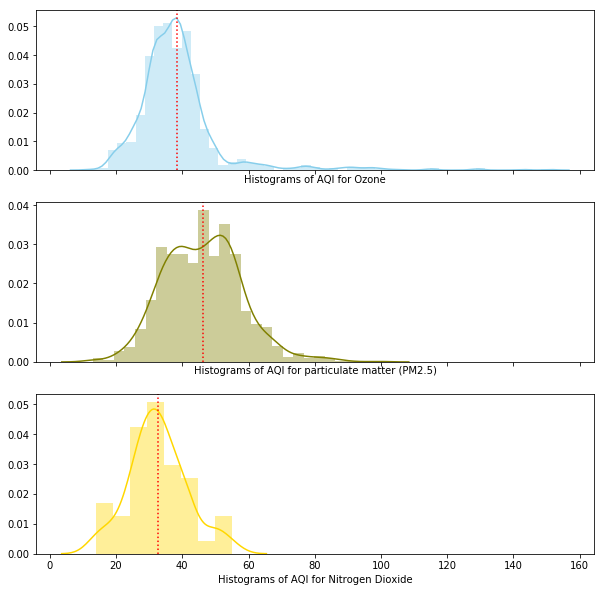

In [6]:
# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

#Mean AQIs per pollutants

m_Oz=SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m_Pm25=SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m_NO2=SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI.mean()

# sns.distplot(SFB_data.AQI) #Hist for all AQIs

f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="skyblue", ax=axes[0],label = "Ozone")
axes[0].axvline(m_Oz, linestyle="dotted",color='r')
axes[0].set(xlabel='Histograms of AQI for Ozone')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[1],label = "PM2.5")
axes[1].axvline(m_Pm25, linestyle="dotted",color='r')
axes[1].set(xlabel='Histograms of AQI for particulate matter (PM2.5)')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[2],label = "NO2")
axes[2].axvline(m_NO2, linestyle="dotted",color='r')
axes[2].set(xlabel='Histograms of AQI for Nitrogen Dioxide')

# sns.distplot( SFB_data.AQI , color="coral", ax=axes[1, 1],label = "All")
# plt.axvline(Avg_AQI, linestyle="dotted",color='black')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# sns.plt.legend()

# plt.xlabel("Histogram of Pollutants' AQI")

In [7]:
#Binning dates into months

SFB_data['Months']=SFB_data.Date.apply(lambda x: str(x)[:1]) #isolate the month
# SFB_data['Months']= SFB_data['Months'].replace({'1': "January",'2': "February",
#                                       '3': "March",'4': "April",
#                                       '5': "May",'6': "June",
#                                       '7': "July",'8': "August",
#                                        '9': "September"})
SFB_data['Months'].unique()
SFB_data['Months'].head
SFB_data.head()



# SFB_data['Months'].max() #Missing data for Oct-December!!
# for index, row in SFB_data.iterrows():
#     month, day, year = len(row['Date'].split("/"))
#     print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/37200142/mm-dd-yyyy-date-to-variable-conversion-m-d-and-y

# month, day, year = time_series_17.split('/')
# print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/36108377/how-to-use-the-split-function-on-every-row-in-a-dataframe-in-python

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Months
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6,1
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6,1
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6,1
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6,1
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6,1


Months
1    43.541219
2    38.190476
3    37.577061
4    41.896296
5    40.000000
6    39.951852
7    42.845878
8    50.949821
9    47.166667
Name: AQI, dtype: float64


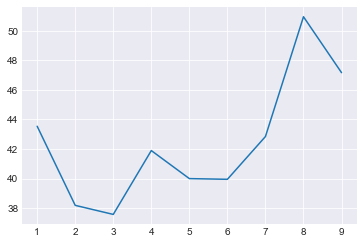

In [8]:
SFB_data_months_m = SFB_data.groupby("Months").mean() 
AQI_m_permonths = SFB_data_months_m.AQI
AQI_m_permonths #Trendline
SFB_data.Category.unique()
print(AQI_m_permonths)

#Avg. AQI per month during 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_permonths)
plt.axhline(Avg_AQI, linestyle="dotted",color='black')
plt.show()

Ozone    1157
PM2.5    1011
NO2        46
SO2         2
PM10        1
Name: Defining Parameter, dtype: int64


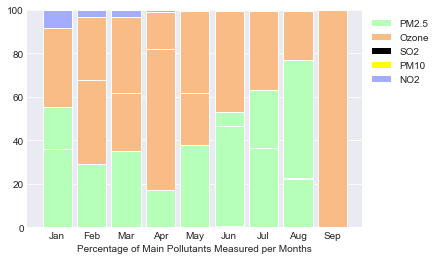

In [9]:
SFB_data_params = SFB_data.groupby('Defining Parameter')

print(SFB_data['Defining Parameter'].value_counts())

    #Gather the count of the measured parameters per month (for param_count)
Jan = SFB_data[SFB_data["Months"] == '1']
# print(Jan['Defining Parameter'].value_counts())
Feb = SFB_data[SFB_data["Months"] == '2']
# print(Feb['Defining Parameter'].value_counts())
Mar = SFB_data[SFB_data["Months"] == '3']
# print(Mar['Defining Parameter'].value_counts())
Apr = SFB_data[SFB_data["Months"] == '4']
# print(Apr['Defining Parameter'].value_counts())
May = SFB_data[SFB_data["Months"] == '5']
# print(May['Defining Parameter'].value_counts())
Jun = SFB_data[SFB_data["Months"] == '6']
# print(Jun['Defining Parameter'].value_counts())
Jul = SFB_data[SFB_data["Months"] == '7']
# print(Jul['Defining Parameter'].value_counts())
Aug = SFB_data[SFB_data["Months"] == '8']
# print(Aug['Defining Parameter'].value_counts())
Sep = SFB_data[SFB_data["Months"] == '9']
# print(Sep['Defining Parameter'].value_counts())

    #Percent Stacked Barplot of Pollutants over the months
    # https://python-graph-gallery.com/13-percent-stacked-barplot/
r = [0,1,2,3,4,5,6,7,8]
param_count = {'PM2.5':[155,73,98,46,106,143,176,214,0],
               'Ozone': [101,171,172,221,172,126,102,62,30],
               'NO2': [23,8,9,3,1,0,1,1,0],
               'SO2': [0,0,0,0,0,0,0,1,0],
               'PM10':[0,0,0,0,0,1,0,0,0]
              }
df_par = pd.DataFrame(param_count)

totals = [i+j+k+l+m for i,j,k,l,m in zip(df_par['PM2.5'], df_par['Ozone'], df_par['NO2'], df_par['SO2'], df_par['PM10'])]
PM25 = [i / j * 100 for i,j in zip(df_par['PM2.5'], totals)]
Ozone = [i / j * 100 for i,j in zip(df_par['Ozone'], totals)]
NO2 = [i / j * 100 for i,j in zip(df_par['NO2'], totals)]
SO2 = [i / j * 100 for i,j in zip(df_par['SO2'], totals)]
PM10 = [i / j * 100 for i,j in zip(df_par['PM10'], totals)]

barWidth = 0.85
names = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep')
plt.bar(r, PM25, color='#b5ffb9', edgecolor='white', width=barWidth,label ="PM2.5" ) #green
plt.bar(r, Ozone, bottom=PM25, color='#f9bc86', edgecolor='white', width=barWidth,label ="Ozone") #orange
plt.bar(r, SO2, bottom=Ozone, color='#000000', edgecolor='white', width=barWidth,label ="SO2") #black
plt.bar(r, PM10, bottom=SO2, color='#FFFF00', edgecolor='white', width=barWidth,label ="PM10") #yellow
plt.bar(r, NO2, bottom=[i+j+k+l for i,j,k,l in zip(PM25, Ozone,SO2,PM10)], color='#a3acff', edgecolor='white', width=barWidth,label ="NO2") # blue

plt.xticks(r, names)
plt.xlabel("Percentage of Main Pollutants Measured per Months")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

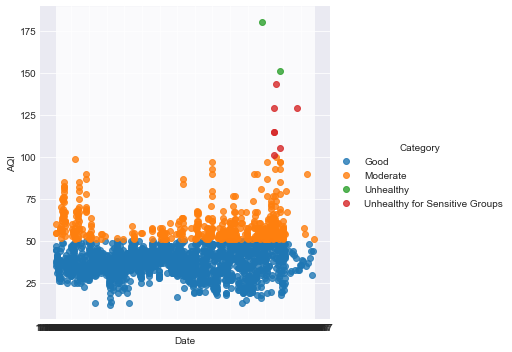

In [10]:
#AQI Distribution for each measurement date
sns.lmplot( x="Date", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
Months                        int32
dtype: object


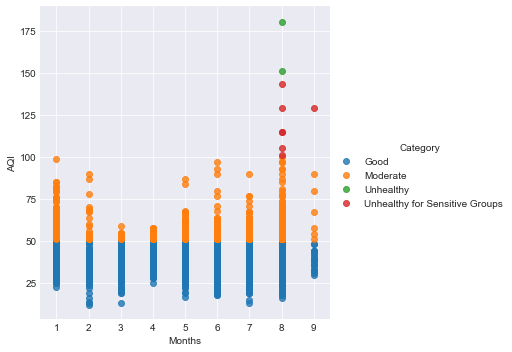

In [11]:
SFB_data.Months=SFB_data.Months.astype(int)
print(SFB_data.dtypes)

#AQI Distribution by months
# colors = {'Good':'#FFD700', 'Moderate':'#87CEFA', 'Unhealthy':'#F08080','Unhealthy':'#F08080'}
sns.lmplot( x="Months", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)
# plt.legend(loc='lower right')

# labels = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups']

In [74]:
#API settup:

KEY ="9A3C2971-7F57-4B80-8908-B2A548BD66FD"
AQI_data = []
url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?"
#Limit: 500 requests per hours
            #Select 63 zip codes for each day from a set of 441 zip codes.
                #Range: Oct. 9th - Oct. 15th.

Zip_csv = "Raw_Data/countyData.csv"
Zip_data = pd.read_csv(Zip_csv)
# zipcode = Zip_data.Zipcode
zipcode_shuffle = Zip_data.sample(frac=1)

print(zipcode_shuffle)

print(len(zipcode_shuffle))
# print(zipcode_shuffle.head())

day_range = [9,10,11,12,13,14]
day_iteration = 0

# for key, value in zipcode_shuffle.items():
#     print(key)
#     print(value)
#     zipcode_row = zipcode_shuffle.items()[zipcode_index]
#     print(zipcode_row)
#     if zipcode_index % 63:
#         day_count = 9
#         set_count += 1
#         print(day_count, set_count)
#         query = f"{url}format=json/csv&zipCode={zipcode_row[2]}&date=2017-10-{day_count}T00-0000&distance=25&API_KEY={KEY}"

    
#     response = requests.get(query).json()
#     print(response)
    


# for i, Zipcode in enumerate(zipcode_shuffle):  #7 days x  63 zipCode = 441 (Oct 9-15), use array for each date
#     if (i % 63 == 0 and i >= 63):
        
#         response = requests.get(url + str(indices[x]))
        
#         set_count += 1
#         record_count = 0
#     print(record_count, set_count)
    
#     city_url = f"{base_url}{ZIP}"
#     print(city_url)


# query_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode={XXX}&date=2017-10-{XXX}T00-0000&distance=25&API_KEY=42C6925A-9E38-4682-8706-77E17F01F983"

# counter = 0
# for index, row in weather_df.iterrows():
    


                   County  Zipcode
48         Alameda County    94618
411         Sonoma County    94922
21         Alameda County    94546
152          Marin County    94938
414         Sonoma County    95404
266    Santa Clara County    95032
190  San Francisco County    94159
298    Santa Clara County    95014
225      San Mateo County    94060
63         Alameda County    94540
274    Santa Clara County    94024
93    Contra Costa County    94516
302    Santa Clara County    95056
275    Santa Clara County    94086
431         Sonoma County    94951
194  San Francisco County    94124
32         Alameda County    94568
292    Santa Clara County    95126
251      San Mateo County    94066
119   Contra Costa County    94524
99    Contra Costa County    94807
184  San Francisco County    94103
391         Sonoma County    94574
78    Contra Costa County    94820
202  San Francisco County    94130
50         Alameda County    94586
5          Alameda County    95377
0          Alameda C

In [77]:
item_count = 0
for item, frame in zipcode_shuffle['Zipcode'].iteritems():
    #print(frame)
    if item_count % 63 == 0:
        start_day = 9
        day_iteration += 1
        print(day_count, set_count)
        query = f"{url}format=json/csv&zipCode={frame}&date=2017-10-{start_day}T00-0000&distance=25&API_KEY={KEY}"
        print(frame)
    item_count = item_count + 1

9 10
94618
9 10
94953
9 10
95497
9 10
94972
9 10
94528
9 10
94539
9 10
95419


In [ ]:
# Sample 70 zip locations for each day between Oct 9th-15th
    #ME: Download 2016 dataset
        #Create appropriate viz for EPA dataset
            #descriptive dataset
            #Time
            #Pollutant
            #location
    #Look at choropleth map library
    

In [12]:
# url1 ="https://aqs.epa.gov/api/rawData?user=hp.nunes@protonmail.com&pw=cobalthawk52&format=AQCSV&pc=AQI_POLLUTANTS&bdate=20170101&edate=20171231&state=06&county=001&county=013&county=041&county=055&county=075&county=081&county=085&county=095&county=097"
# request1 = requests.get(url1).json()
# print(request1)
# pprint(request_json)

#Variables of interest:
    #AQI except filter where AQI = -1
    #Category
    #Lat, Long
    #StateCode
    #ReportingArea
    #DateForecast & DateIssue
    #ParameterName
        #link to documentation: https://docs.airnowapi.org/forecastsbylatlon/docs

[{'AQI': 50,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-09 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 46,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-10 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-11 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-12 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude':

In [20]:
#Query by zip code

url_z = "http://www.airnowapi.org/aq/observation/zipCode/current/?format=application/json&zipCode=94133&distance=25&API_KEY=E2D50D6C-9124-4349-8C9A-96C411439052"
print(requests.get(url_z))

<Response [200]>


In [19]:
request_z = requests.get(url_z)
request_z_json=request_z.json()
pprint(request_z_json)

[{'AQI': 28,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'O3',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 53,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
